In [6]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the Data

In [7]:
from model_utils import load_X_y

X, y = load_X_y()

# Categorical Target Thresholding

In [8]:
import matplotlib.pyplot as plt
plt.style.use('default')

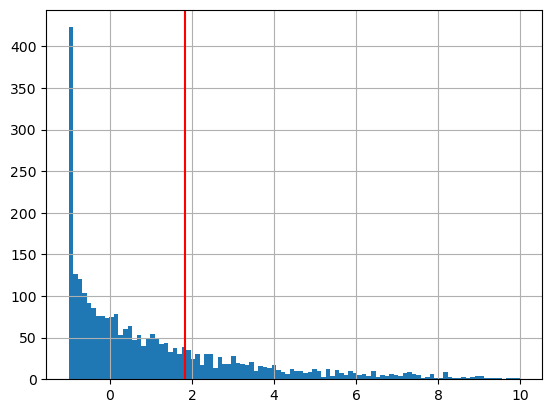

In [9]:
from model_utils import categorical_threasholding_y

y = categorical_threasholding_y(y, single_percentile=0.3)

# Split the Data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2160, 224), (721, 224), (2160,), (721,))

# Feature Selection

using only movie-related features 


In [11]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [12]:
from model_utils import boruta_feature_selection

X_train_sel, X_test_sel = boruta_feature_selection(X_train, X_test, y_train, max_iter = 100)

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100
Iteration: 47 / 100
Iteration: 48 / 100
Iteration: 49 / 100
Iteration: 50 / 100
Iteration

In [13]:
X_train_sel.shape, X_test_sel.shape

((2160, 36), (721, 36))

# MERGING GRIDSEARCH

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from model_utils import run_grid_search

cv_results = run_grid_search(X_train_sel, y_train)

Fitting 5 folds for each of 386 candidates, totalling 1930 fits
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   0.9s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   0.8s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   0.8s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   0.9s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   0.8s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=<settings.columnDropperTransformer object at 0x146ede4d0>; total time=   0.7s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=<settings.columnDropperTransformer object at 0x146ede4d0>; total time=   0.7s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=<settings.columnDrop

In [54]:
cv_results

,param_clf,param_clf__C,param_clf__gamma,param_clf__kernel,param_marcro_drop,param_clf__penalty,param_clf__solver,param_clf__var_smoothing,param_clf__activation,param_clf__alpha,...,param_clf__bootstrap,param_clf__max_depth,param_clf__min_samples_leaf,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_clf_name,marcro_drop_name
351,"(DecisionTreeClassifier(max_depth=16, max_feat...",NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,False,16,2,0.935185,0.935185,0.933796,0.002778,1,RandomForestClassifier,without_macro
338,"(DecisionTreeClassifier(max_depth=16, max_feat...",NaN,NaN,NaN,passthrough,NaN,NaN,NaN,NaN,NaN,...,False,14,2,0.939815,0.932870,0.932870,0.003586,2,RandomForestClassifier,with_macro
315,"(DecisionTreeClassifier(max_depth=16, max_feat...",NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,False,10,2,0.935185,0.928241,0.932407,0.003402,3,RandomForestClassifier,without_macro
374,"(DecisionTreeClassifier(max_depth=16, max_feat...",NaN,NaN,NaN,passthrough,NaN,NaN,NaN,NaN,NaN,...,False,20,2,0.921296,0.928241,0.932407,0.007082,3,RandomForestClassifier,with_macro
314,"(DecisionTreeClassifier(max_depth=16, max_feat...",NaN,NaN,NaN,passthrough,NaN,NaN,NaN,NaN,NaN,...,False,10,2,0.930556,0.932870,0.931944,0.001134,5,RandomForestClassifier,with_macro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,SVC(),0.1,1,rbf,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.722222,0.710648,0.696759,0.018576,380,SVC,without_macro
0,SVC(),0.1,1,rbf,passthrough,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.722222,0.710648,0.696759,0.018576,380,SVC,with_macro
70,SVC(),10,1,sigmoid,passthrough,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.673611,0.685185,0.686574,0.012388,384,SVC,with_macro
39,SVC(),1,1,sigmoid,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.708333,0.666667,0.679630,0.022567,385,SVC,without_macro


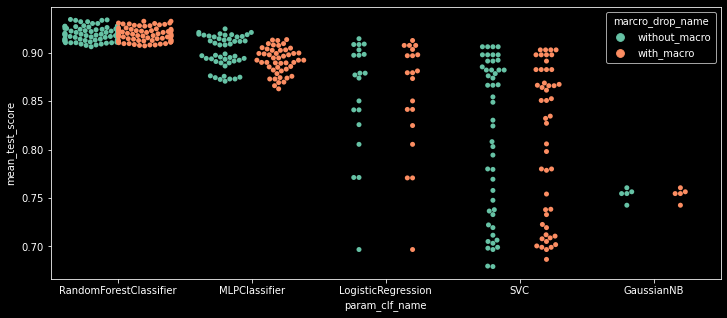

In [30]:
from model_utils import compare_models_plot
    
compare_models_plot(cv_results)

# Evaluation

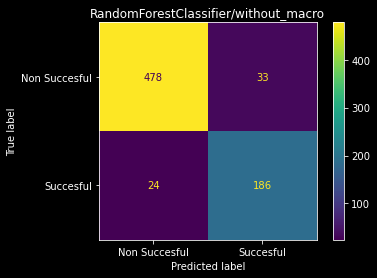

               precision    recall  f1-score   support

Non Succesful       0.95      0.94      0.94       511
    Succesful       0.85      0.89      0.87       210

     accuracy                           0.92       721
    macro avg       0.90      0.91      0.91       721
 weighted avg       0.92      0.92      0.92       721



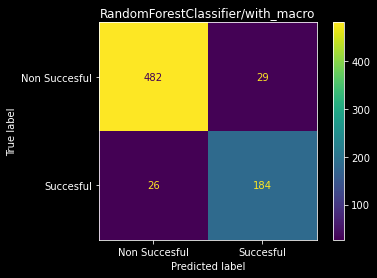

               precision    recall  f1-score   support

Non Succesful       0.95      0.94      0.95       511
    Succesful       0.86      0.88      0.87       210

     accuracy                           0.92       721
    macro avg       0.91      0.91      0.91       721
 weighted avg       0.92      0.92      0.92       721



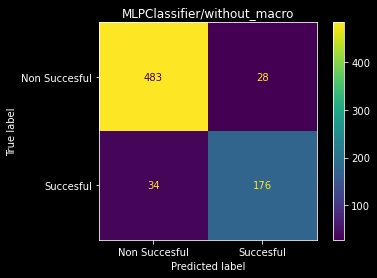

               precision    recall  f1-score   support

Non Succesful       0.93      0.95      0.94       511
    Succesful       0.86      0.84      0.85       210

     accuracy                           0.91       721
    macro avg       0.90      0.89      0.89       721
 weighted avg       0.91      0.91      0.91       721



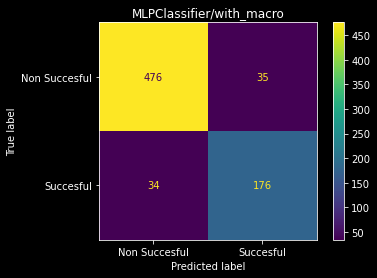

               precision    recall  f1-score   support

Non Succesful       0.93      0.93      0.93       511
    Succesful       0.83      0.84      0.84       210

     accuracy                           0.90       721
    macro avg       0.88      0.88      0.88       721
 weighted avg       0.90      0.90      0.90       721



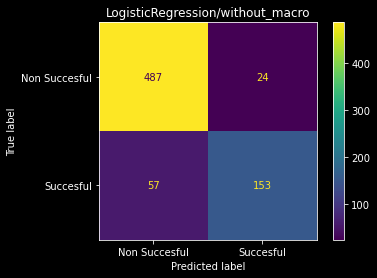

               precision    recall  f1-score   support

Non Succesful       0.90      0.95      0.92       511
    Succesful       0.86      0.73      0.79       210

     accuracy                           0.89       721
    macro avg       0.88      0.84      0.86       721
 weighted avg       0.89      0.89      0.88       721



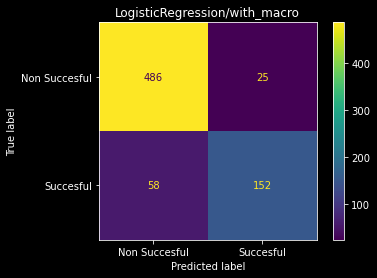

               precision    recall  f1-score   support

Non Succesful       0.89      0.95      0.92       511
    Succesful       0.86      0.72      0.79       210

     accuracy                           0.88       721
    macro avg       0.88      0.84      0.85       721
 weighted avg       0.88      0.88      0.88       721



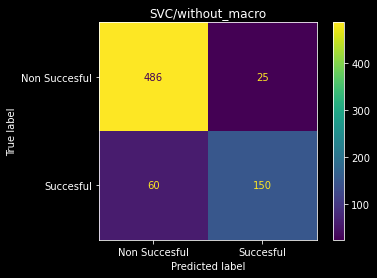

               precision    recall  f1-score   support

Non Succesful       0.89      0.95      0.92       511
    Succesful       0.86      0.71      0.78       210

     accuracy                           0.88       721
    macro avg       0.87      0.83      0.85       721
 weighted avg       0.88      0.88      0.88       721



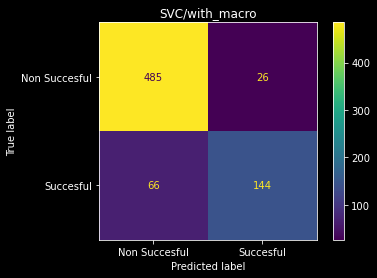

               precision    recall  f1-score   support

Non Succesful       0.88      0.95      0.91       511
    Succesful       0.85      0.69      0.76       210

     accuracy                           0.87       721
    macro avg       0.86      0.82      0.84       721
 weighted avg       0.87      0.87      0.87       721



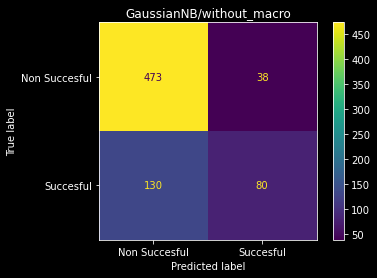

               precision    recall  f1-score   support

Non Succesful       0.78      0.93      0.85       511
    Succesful       0.68      0.38      0.49       210

     accuracy                           0.77       721
    macro avg       0.73      0.65      0.67       721
 weighted avg       0.75      0.77      0.74       721



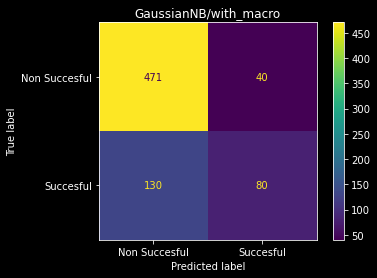

               precision    recall  f1-score   support

Non Succesful       0.78      0.92      0.85       511
    Succesful       0.67      0.38      0.48       210

     accuracy                           0.76       721
    macro avg       0.73      0.65      0.67       721
 weighted avg       0.75      0.76      0.74       721



In [31]:
from model_utils import evaluate_best_models
evaluate_best_models(cv_results, X_train_sel, y_train, X_test_sel, y_test)

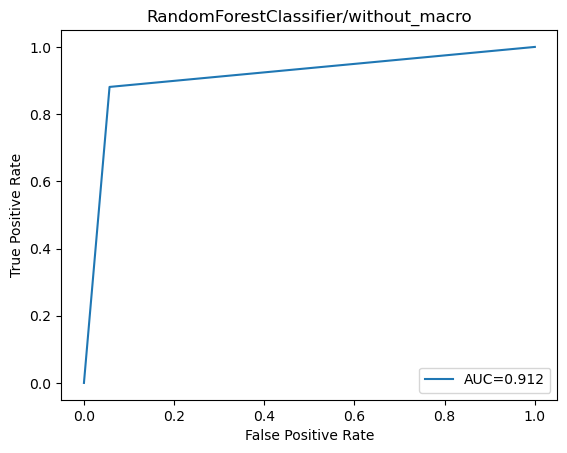

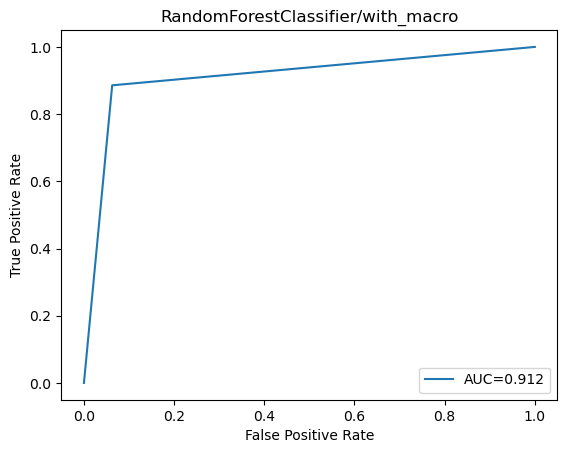

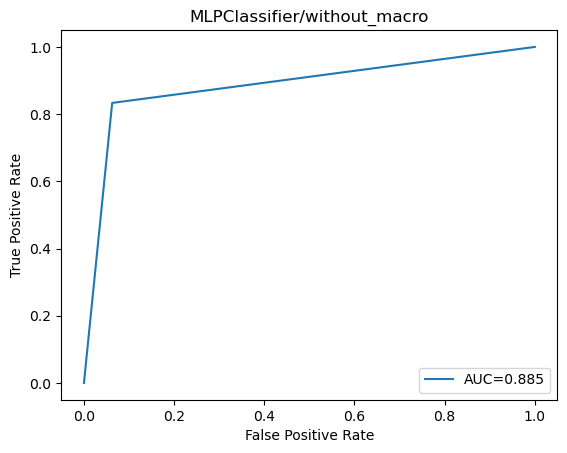

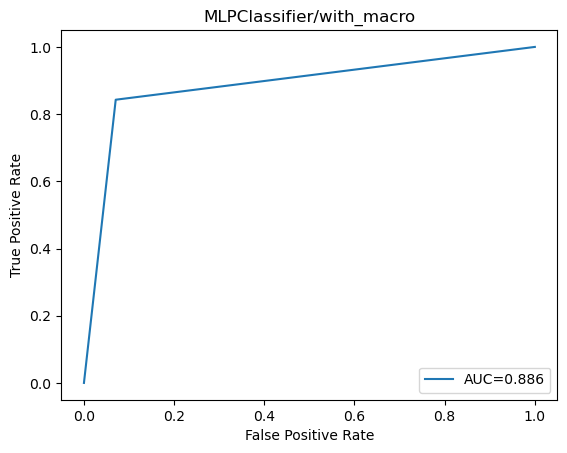

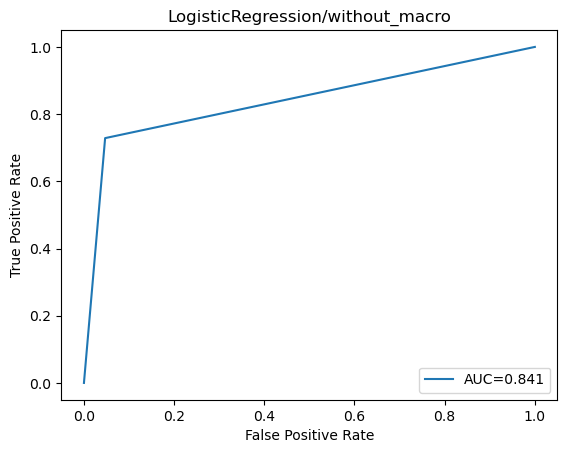

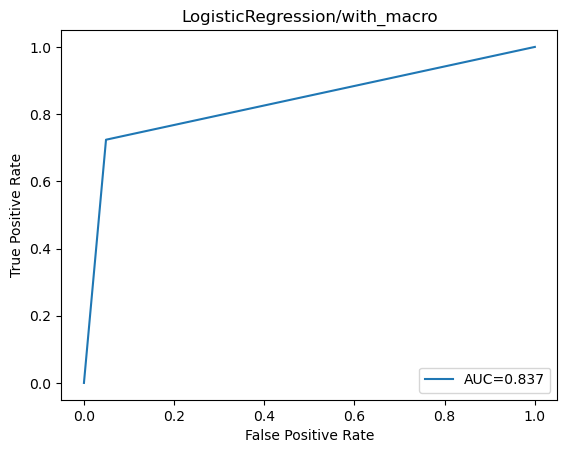

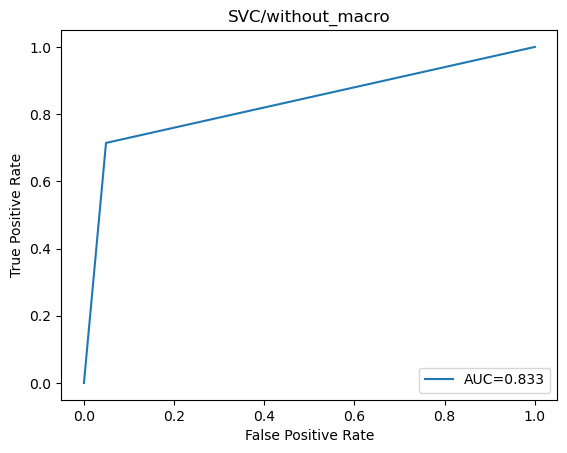

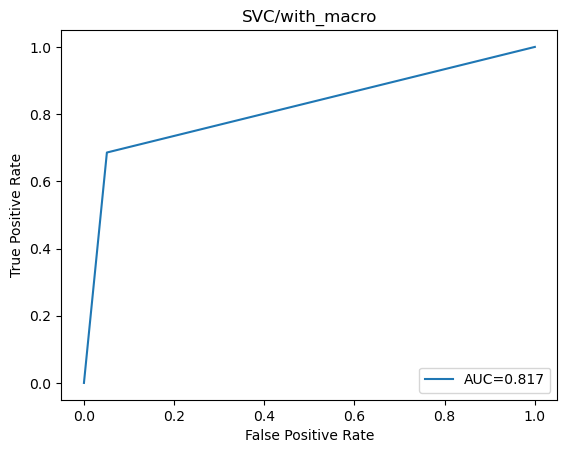

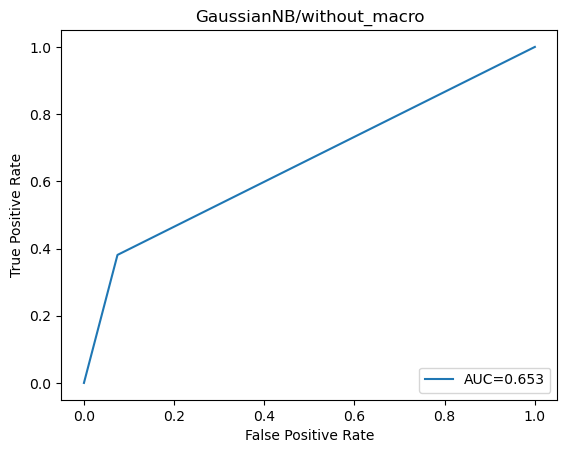

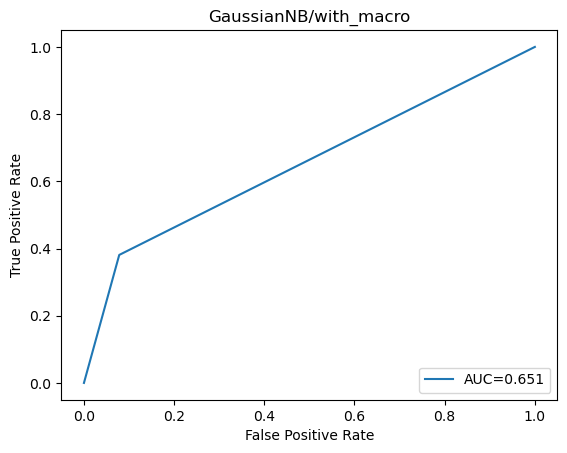

In [132]:
from model_utils import evaluate_best_models2
evaluate_best_models2(cv_results, X_train_sel, y_train, X_test_sel, y_test)

## BASELINE MODEL 

In [110]:
# zero rule algorithm for classification
import pandas as pd
zero_rule = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,])
print(zero_rule)

0      0
1      0
2      0
3      0
4      0
      ..
716    0
717    0
718    0
719    0
720    0
Length: 721, dtype: int64


In [115]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, zero_rule)

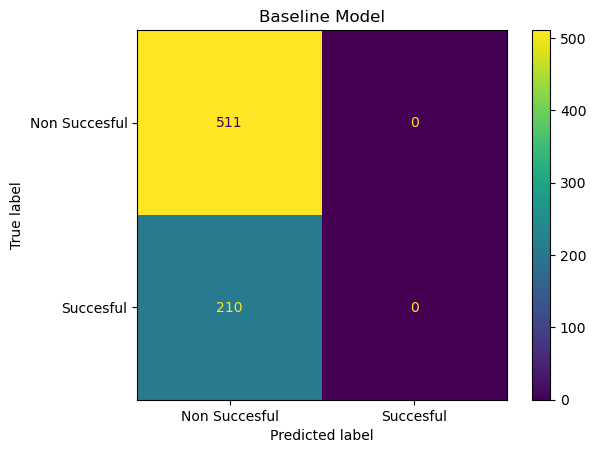

               precision    recall  f1-score   support

Non Succesful       0.71      1.00      0.83       511
    Succesful       0.00      0.00      0.00       210

     accuracy                           0.71       721
    macro avg       0.35      0.50      0.41       721
 weighted avg       0.50      0.71      0.59       721



In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

labels=[0, 1]
target_names=['Non Succesful', 'Succesful']

cm = confusion_matrix(y_true = y_test, y_pred = zero_rule, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title('Baseline Model')
plt.show()
print(classification_report(y_true=y_test, y_pred=zero_rule, target_names=target_names))

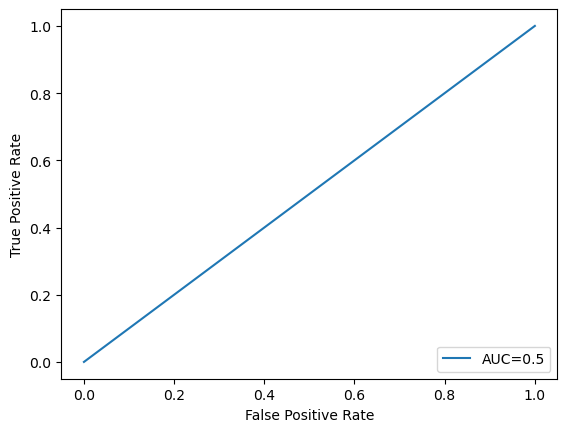

In [128]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test, zero_rule)
auc = metrics.roc_auc_score(y_test, zero_rule)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## SHAP

In [147]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 KB 5.2 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 8.9 MB/s eta 0:00:00:00:0100:01
  Using cached numpy-1.21.6-cp310-cp310-macosx_10_9_x86_64.whl (17.0 MB)
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-macosx_10_9_x86_64.whl size=430784 sha256=dadce62e6f8858bf9778b09d3ba4814019262cbbc8308cb2551f58ce1cb00ac6
  Stored in directory: /Users/iza/Library/Caches/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3
Note: you may need to restart the kernel to use updated packages.

In [35]:
import shap 

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=20, min_samples_leaf=2)
model.fit(X_train_sel, y_train)
y_pred = model.predict(X_test_sel)

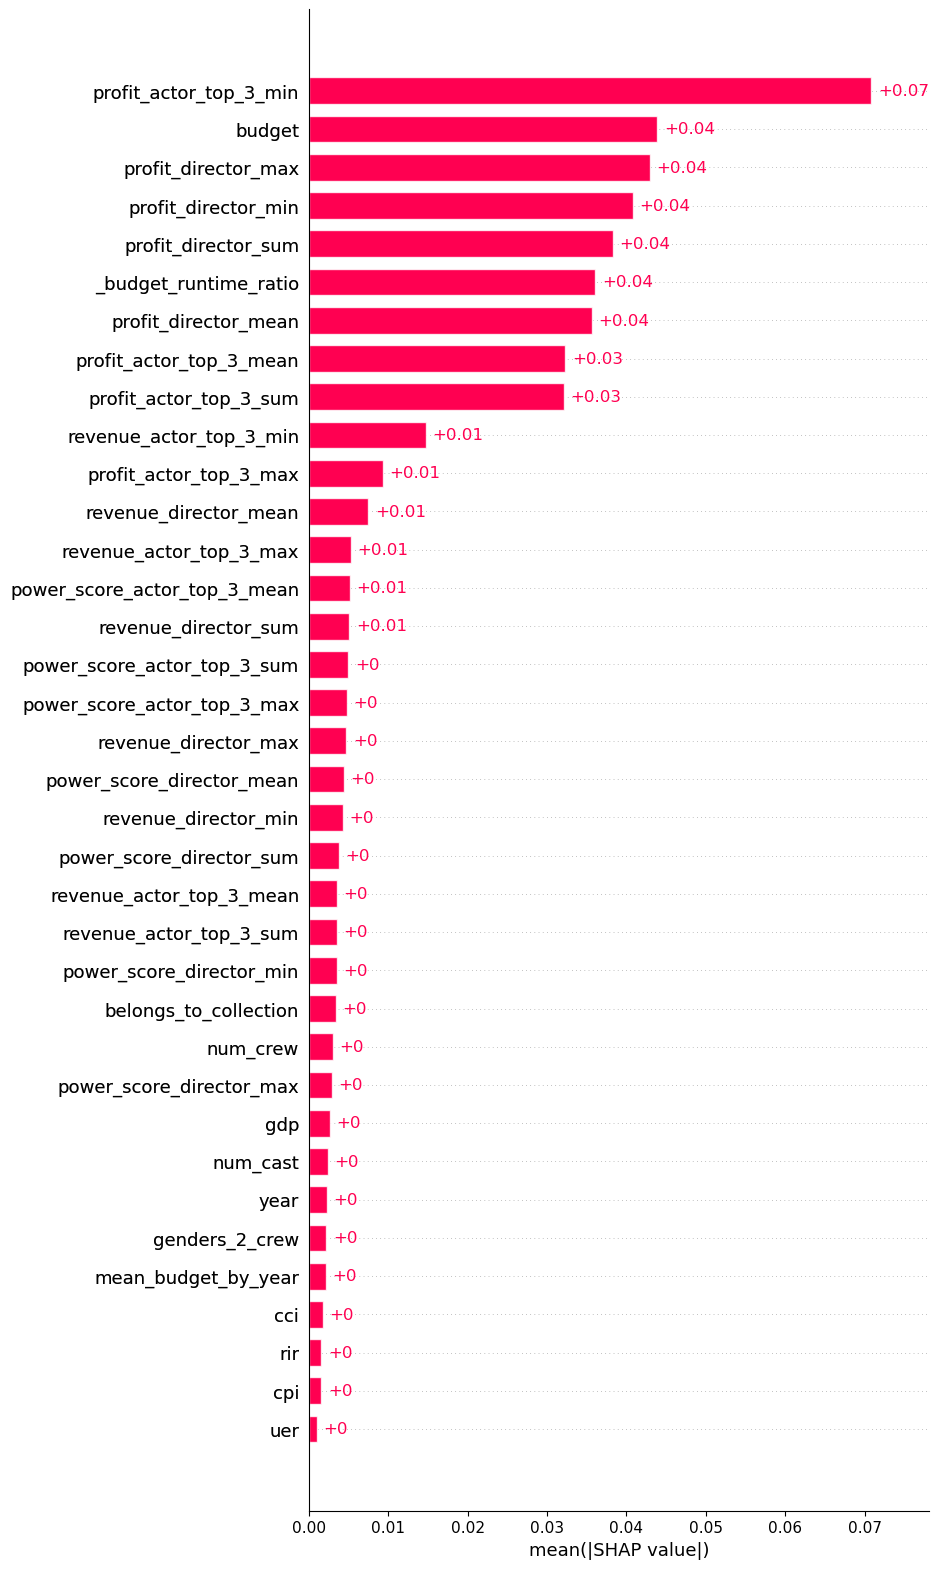

In [53]:
import matplotlib.pyplot as plt

explainer = shap.Explainer(model)
shap_values2 = explainer(X_train_sel)
fig = shap.plots.bar(shap_values2[:, :, 0], max_display=X_train_sel.shape[1], show=False)
#plt.savefig("images/shap_1.jpg",dpi=150, bbox_inches='tight')
